<a href="https://colab.research.google.com/github/kangel429/DeepLearning/blob/master/lesson2_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline              
#notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
from fastai.basics import *

SGD

In [0]:
n=100

In [0]:
x = torch.ones(n,2)       # 주어진 사이즈의 1로 이루어진 텐서 생성.  100개의 행과 2열
x[:,0].uniform_(-1.,1)    #-1~1 사이의 임의의 float을  : ->전부 (100개의 전부)  0 -> 1열의 해당되는 부분
x[:5]

tensor([[-0.1850,  1.0000],
        [-0.7448,  1.0000],
        [-0.4597,  1.0000],
        [-0.1317,  1.0000],
        [ 0.0804,  1.0000]])

In [0]:
a = tensor(3.,2); a         #([3., 2.])텐서 생성

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)     # x사이에 행렬 a 곱하기, torch.rand는 n번만큼 0과 1사이의 숫자를 균등하게 생성

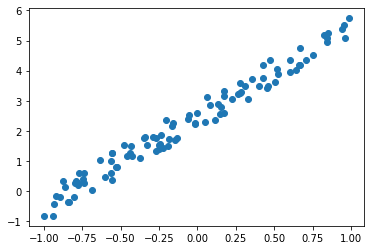

In [0]:
plt.scatter(x[:,0], y);     # 그래프 표 그리기                          

*손실* ---> 각 지점의 선이 점에서 얼마나 멀리 떨어져 있으며 모든 점들의 평균을 구할 수 있다  (손실의 크기가 크면 클수록 정확성이 떨어진다

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean() #손실 함수는 (output, target)을 한 쌍(pair)의 입력으로 받아, 출력(output)이 정답(target)으로부터 얼마나 멀리 떨어져있는지 추정하는 값을 계산합니다.

y_hat : 예측 (output)  

y  :  정답(target)

손실 함수는 (output, target)을 한 쌍(pair)의 입력으로 받아, 출력(output)이 정답(target)으로부터 얼마나 멀리 떨어져있는지 추정하는 값을 계산합니다.

손실이 작을수록 훈련이 잘 된거임

In [0]:
a = tensor(-1.,1)

In [0]:
y_hat = x@a
mse(y_hat, y)       #예측과 실제의 평균 오차를 구할 수 있으며 ----> 손실  7.8의 차이의 손실이다.

tensor(6.2059)

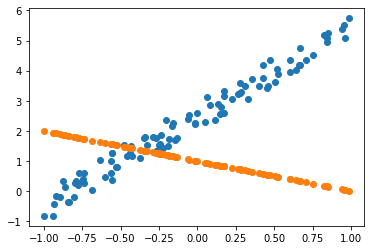

In [0]:
plt.scatter(x[:,0],y)               # 파랑 -- 정답
plt.scatter(x[:,0],y_hat);      # 주황색 ---예측

# Gradient Descent

[PyTorch] GPU를 활용하여 인공 신경망 모델을 만들고 학습시킬 수 있게 도와준다

In [0]:
a = nn.Parameter(a); a            #Tensor의 한 종류로, Module 에 속성으로 할당될 때 자동으로 매개변수로 등록 됩니다.

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a                      #y_hat 예측
    loss = mse(y, y_hat)             #loss 구하는 함수  
    if t % 10 == 0: print(loss)      #학습의 진행상태 찍어봄
    loss.backward()                   #loss의 변화도를 계산 -- requires_grad=True 일때 Tensor 내에 저장하여 모든 모델의 학습 가능한 매개변수의 변화도를 계산
    with torch.no_grad():           #기록을 추적하는 것(과 메모리를 사용하는 것)을 방지하기 위해
        a.sub_(lr * a.grad)         # 경사하강법(gradient descent)을 사용하여 가중치를 갱신합니다.
        a.grad.zero_()              #  가중치 갱신 후에는 수동으로 변화도를 0으로 만듭니다.

In [0]:
lr = 1e-1                             #학습 속도
for t in range(100): update()         #100번 정도 학습

tensor(6.2059, grad_fn=<MeanBackward0>)
tensor(1.5382, grad_fn=<MeanBackward0>)
tensor(0.4927, grad_fn=<MeanBackward0>)
tensor(0.1960, grad_fn=<MeanBackward0>)
tensor(0.1108, grad_fn=<MeanBackward0>)
tensor(0.0864, grad_fn=<MeanBackward0>)
tensor(0.0794, grad_fn=<MeanBackward0>)
tensor(0.0774, grad_fn=<MeanBackward0>)
tensor(0.0768, grad_fn=<MeanBackward0>)
tensor(0.0766, grad_fn=<MeanBackward0>)


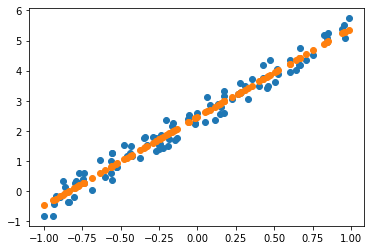

In [0]:
plt.scatter(x[:,0],y)       #파랑색점 정답지
with torch.no_grad():
    plt.scatter(x[:,0],x@a);    #훈련을 다하고 난 다음의 예측점들  --- 오차율 7%

## Animate it!

변화되는 것을 시물레이션 해보기

matplotlib -- 파이썬에서 매트랩과 유사한 그래프 표시를 가능케 하는 라이브러리인데 임포트시킴

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [0]:
a = nn.Parameter(tensor(-1.,1))  #Tensor의 한 종류로, Module 에 속성으로 할당될 때 자동으로 매개변수로 등록 됩니다.여기서는 tensor(-1.,1) 로 지정해줌

fig = plt.figure()              #그래프 
plt.scatter(x[:,0], y, c='orange')    #정답지에 해당되는 점은 오렌지 색으로 그리기
with torch.no_grad():
    line, = plt.plot(x[:,0], x@a)   #파란색 예측 선 그리기
plt.close()

def animate(i):
    update()          
    with torch.no_grad():
        line.set_ydata(x@a)     #y의 움직임 
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20) #fig그래프 객체, animate함수, 0~100범위, interval 시간 간격 20 = 1000(1초) Defaults to 200.